In [1]:
import matplotlib.pyplot as plt

from General.experiments.hdf5.readHDF5 import read_hdf5
from General.experiments.spectrum import TemporalSpectrum
from General.experiments.oes import OESData
from General.plotting import plot, cbar

out_loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques'
emission_ranges = ((270, 400), (654, 659), (690, 860), (776, 779))

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


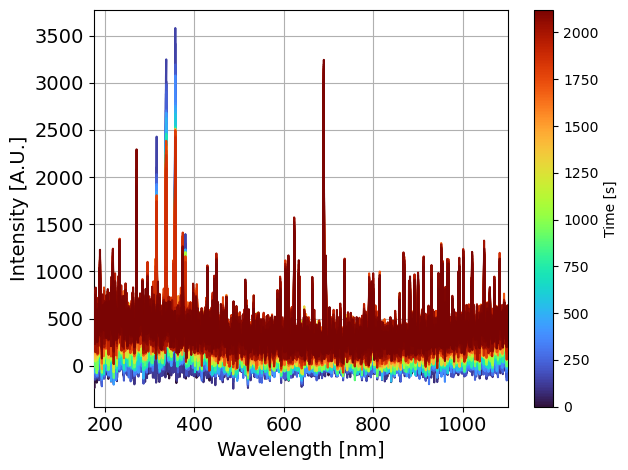

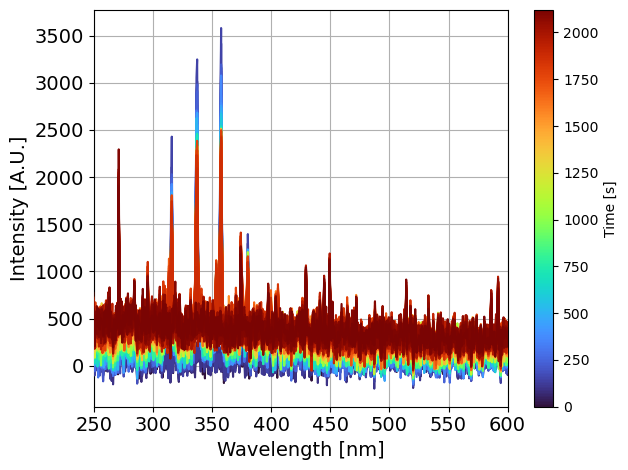

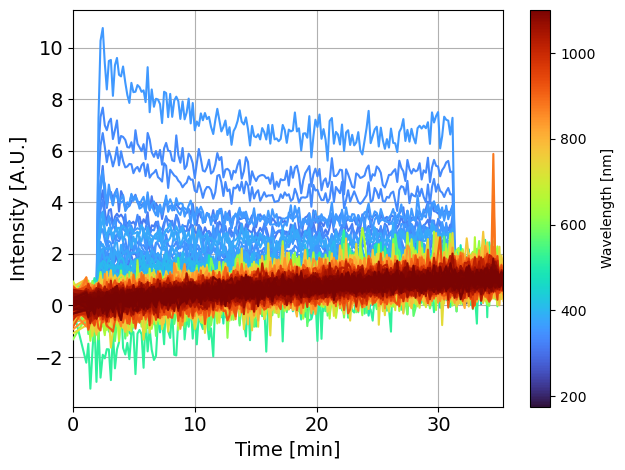

In [2]:
loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Results\Air_3slm_Ar_1slm_10kV_0.5us.hdf5'
data = read_hdf5(loc)
emission_data: OESData = data['emission']
emission_data = emission_data.remove_dead_pixels()

emission_data.intensity_vs_wavelength_with_time()
emission_data.intensity_vs_wavelength_with_time(plot_kwargs={'xlim': (250, 600)})
emission_data.intensity_vs_time_with_wavelength(norm=True)

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


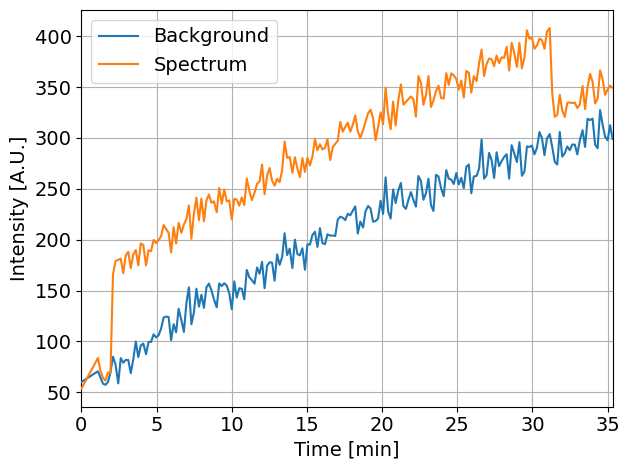

In [3]:
fig_ax = emission_data.total_intensity_vs_time((500, 600), labels=['Background'], show=False)
emission_data.total_intensity_vs_time(emission_ranges, labels=['Spectrum'], fig_ax=fig_ax, save_loc=rf'{out_loc}\start_intensities.pdf')

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


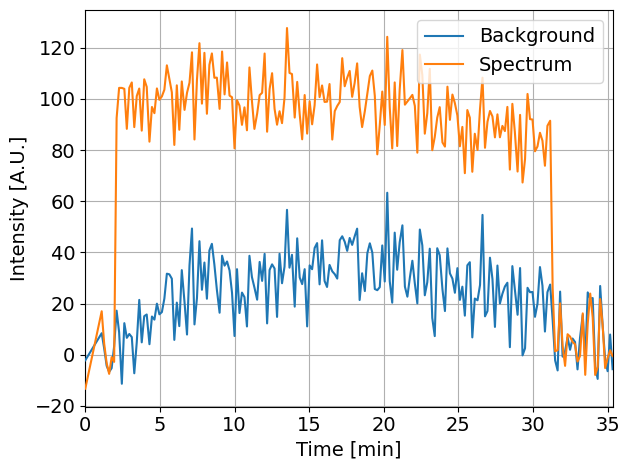

In [4]:
step1 = emission_data.remove_background_interp((None, 5), (len(emission_data.intensities)-5, None))
fig_ax = step1.total_intensity_vs_time((500, 600), labels=['Background'], show=False)
step1.total_intensity_vs_time(emission_ranges, labels=['Spectrum'], fig_ax=fig_ax, save_loc=rf'{out_loc}\clean1_intensities.pdf', legend_kwargs={'loc': 'upper right'})

In [5]:
is_on_kwargs = {'wavelength_range': emission_ranges, 'relative_threshold': 0.3}
clean_emission_data = emission_data.remove_background_interp_off(is_on_kwargs)

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


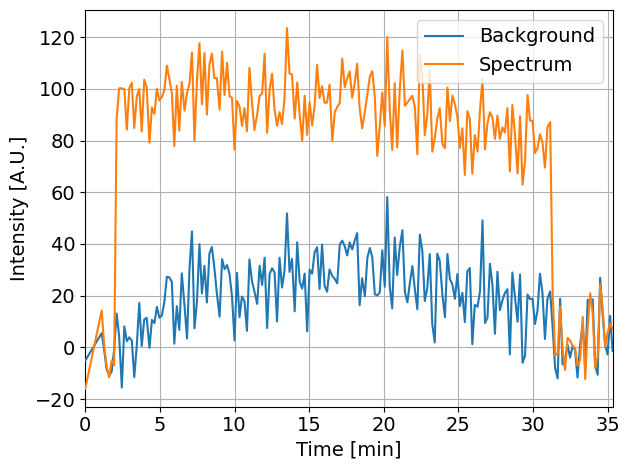

In [6]:
fig_ax = clean_emission_data.total_intensity_vs_time((500, 600), labels=['Background'], show=False)
clean_emission_data.total_intensity_vs_time(emission_ranges, labels=['Spectrum'], fig_ax=fig_ax, save_loc=rf'{out_loc}\clean2_intensities.pdf', legend_kwargs={'loc': 'upper right'})

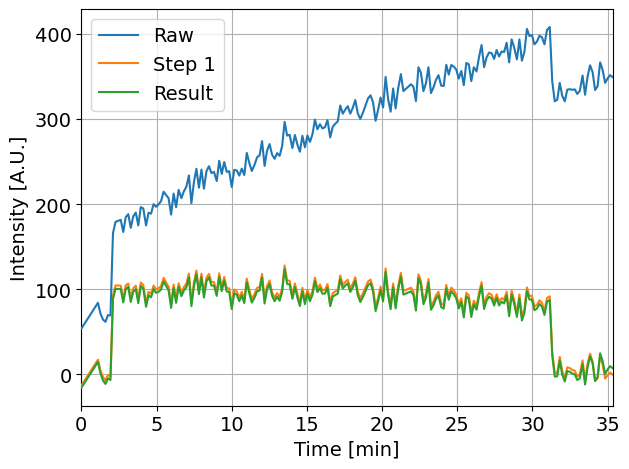

In [7]:
fig_ax = emission_data.total_intensity_vs_time(emission_ranges, labels=['Raw'], show=False)
fig_ax = step1.total_intensity_vs_time(emission_ranges, labels=['Step 1'], show=False, fig_ax=fig_ax)
clean_emission_data.total_intensity_vs_time(emission_ranges, labels=['Result'], fig_ax=fig_ax, save_loc=rf'{out_loc}\clean2_intensities.png')